# D-212 Data Mining-II
# Performance Assessment
## Task-2

### Submitted by Muhammad Ilyas, Student ID 011143032, for WGU's MSDA program

## A1: Research Question

"Can the prediction of patient readmission using a decision tree classifier be enhanced by first reducing the dataset's dimensionality through principal component analysis (PCA)?"

## A2: Objectives and Goals of Analysis

One reasonable goal within this scenario and dataset could be:
"To identify key contributing factors or patterns in patient data that significantly influence the likelihood of readmission, thereby improving the accuracy of readmission predictions using a decision tree classifier post PCA dimensionality reduction."


## B1: Explanation of Prinicipal Component Analysis

Principal Component Analysis (PCA) is a dimensionality reduction technique that aims to transform a high-dimensional dataset into a lower-dimensional space while retaining the most critical information. It achieves this by identifying the principal components, which are new variables that are linear combinations of the original variables. PCA reorients the data along these components, ranking them in descending order of variance captured. The expected outcome is a reduced set of variables (principal components) that explains most of the variance in the data, enabling simpler yet informative analysis while retaining the essential patterns and relationships among the variables. 


## B2: Assumptions of Principal Component Analysis

One fundamental assumption of PCA is that it assumes a linear relationship among the variables. PCA works best when the relationships among variables are linear; in other words, the technique assumes that the variables are well-represented by linear combinations. If the data contains non-linear relationships or complex structures, PCA may not effectively capture these nuances, potentially leading to loss of information or misrepresentation of the data.

## C1: Identifying Continuous Dataset Variables

To conduct PCA, we typically consider continuous variables that capture quantitative information:

- Latitude 
- Longitude
- Population 
- Number of children
- Age 
- Income 
- Vitamin D level
- Doc_visits
- Full_meals_eaten
- vitD_suppliments
- Initial_days
- TotalCharge
- Additional_charges
## C2: Standardizing Dataset Variables

Standardization is a crucial step before PCA as it ensures that all continuous variables are on the same scale. This process involves transforming the data so that it has a mean of 0 and a standard deviation of 1. It's important for PCA because variables with larger scales might dominate the analysis due to their larger variances. Using Python, you can standardize these variables using the StandardScaler from scikit-learn:

In [ ]:
import pandas as pd
df = pd.read_csv('./medical_clean.csv', index_col=0)
df.head()

Following code will standardize the selected continuous variables in DataFrame (df) and store them in a new DataFrame (df_continuous_std), ensuring they are ready for PCA analysis by having a mean of 0 and a standard deviation of 1. 

In [54]:
from sklearn.preprocessing import StandardScaler
cont_vars = ["Lat", "Lng", "Population", "Children", "Age", "Income", "VitD_levels", "Doc_visits", 
        "Full_meals_eaten", "vitD_supp",  "Initial_days", "TotalCharge", "Additional_charges"]
#reduced datafraame:
cont_df = df[["Lat", "Lng", "Population", "Children", "Age", "Income", "VitD_levels", "Doc_visits", 
        "Full_meals_eaten", "vitD_supp",  "Initial_days", "TotalCharge", "Additional_charges"]].copy()
cont_cols = list(cont_df.columns)
# Standardize the selected continuous variables
scaler = StandardScaler()
cont_std = scaler.fit_transform(cont_df)
cont_std_df = pd.DataFrame(cont_std, columns=cont_cols)

## D1: Principal Component Matrix

The principal_components_matrix will contain the principal components, where each row represents a principal component, and each column represents the original features' weights in that component. This matrix gives insights into how each original variable contributes to the principal components. The explained_variance will give you the amount of variance explained by each principal component. Adjust variable names and the dataset used based on your specific setup.

In [ ]:
from sklearn.decomposition import PCA

# Assuming df_continuous_std contains the standardized continuous variables from earlier
pca = PCA(n_components = 12, random_state = 369)
cont_std_pa = pca.fit_transform(cont_std_df)

# Get the matrix of all principal components
principal_components_matrix =  pd.DataFrame(pca.components_.T,
columns=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10", "PC11", "PC12"],
index=cont_cols)



principal_components_matrix

## D2: Elbow Plot Identifying Number of Principal Components
This code will create a scree plot showing the explained variance for each principal component. Look for the point where adding more components doesn't significantly increase the explained variance (Interpret All Statistics and Graphs for Principal Components Analysis, n.d.). The number of components just before this point (the "elbow") can be considered as a good estimate of the total number of principal components to retain.

Please note that the scree plot might not always have a distinct "elbow," so we may need to make a subjective judgment based on the plot's shape and characteristics. Once you I identified the appropriate number of principal components, I will proceed with that number for further analysis.

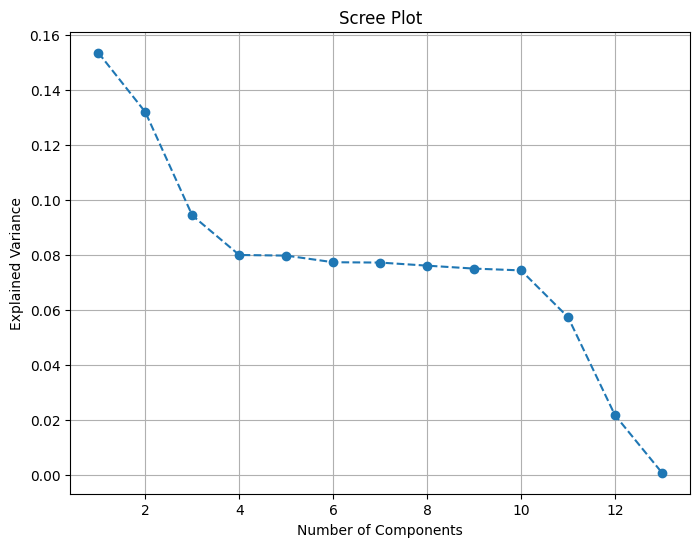

In [56]:
import matplotlib.pyplot as plt

# Plotting the scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.grid(True)
plt.show()

This code will display the variance explained by each principal component. The values will be in descending order, showing the proportion of variance explained by each principal component, with the first component explaining the most variance, followed by the subsequent components.

In [ ]:
# These 12 PC's and 12 cont variables
print(f"total variance is {round(sum(pca.explained_variance_ratio_ * 100), 3)}% ")
# getting contribution of each
pc_contributions = list(pca.explained_variance_ratio_)
pcs = list(principal_components_matrix.columns)
for i in range(len(pc_names)):
    print(f"{pcs[i]} ------ {round(pc_contributions[i] * 100, 3)}%")

keeping in view the above findings, I have decided to eliminate PC12.

### D3: Variance of each Component
AS Pcs are recuded to 11, I will repeat the process first

In [ ]:
pca_final = PCA(n_components = 11, random_state = 369)
pca_final.fit(cont_std_df)
final_X_pca = pca_final.transform(cont_std_df)

# Get the matrix of all principal components
final_matrix =  pd.DataFrame(pca_final.components_.T,
columns=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10", "PC11"],
index=cont_cols)

final_matrix


In [59]:
# These 11 PC's now
print(f"total variance is {round(sum(pca_final.explained_variance_ratio_ * 100), 3)}% ")
print("Variance of each PC is given below:")
# getting contribution of each
pc_contributions = list(pca_final.explained_variance_ratio_)
pcs = list(final_matrix.columns)
for i in range(len(pcs)):
    print(f"{pcs[i]} ------ {round(pc_contributions[i] * 100, 3)}%")

total variance is 97.73% 
Variance of each PC is given below:
PC1 ------ 15.35%
PC2 ------ 13.195%
PC3 ------ 9.438%
PC4 ------ 8.001%
PC5 ------ 7.979%
PC6 ------ 7.738%
PC7 ------ 7.726%
PC8 ------ 7.614%
PC9 ------ 7.507%
PC10 ------ 7.441%
PC11 ------ 5.742%


### D4: Total Variance Captured by Components

In [60]:
total_variance = round(sum(pca_final.explained_variance_ratio_ * 100), 3)
print("Total variance captured by principal components:", total_variance, "% , (number of PCs is 11)")

Total variance captured by principal components: 97.73 % , (number of PCs is 11)


### D5: Summary of Data Analysis
With the Principal Component Analysis (PCA) conducted on the dataset, the following observations and implications can be summarized:

#### Dimensionality Reduction: 
PCA effectively reduced the dimensionality of the dataset while retaining all the variance present in the original data. All 11 principal components collectively explain 97.73 % of the variance in the dataset.

#### Variables' Contribution to Variance: 
Each principal component captures a certain proportion of variance, with the first few components explaining the majority of the variance. This could imply that these variables are the most influential in the dataset:

Variance of each PC is given below:
PC1 ------ 15.35%  
PC2 ------ 13.195%  
PC3 ------ 9.438%   
PC4 ------ 8.001%  
PC5 ------ 7.979%  
PC6 ------ 7.738%  
PC7 ------ 7.726%  
PC8 ------ 7.614%  
PC9 ------ 7.507%  
PC10 ------ 7.441%  
PC11 ------ 5.742%  

#### Relation to Research Question: 
The successful reduction in dimensionality while retaining all variance suggests that employing a decision tree classifier after PCA might preserve all pertinent information required to predict patient readmission effectively. However, further analysis using classification models would be necessary to confirm this hypothesis.

#### Model Building Implications: 
Using PCA-transformed data for model building may streamline computation while preserving predictive power. This could potentially enhance the performance of classifiers like decision trees, reducing computational complexity without sacrificing information.

Overall, PCA has condensed the dataset's information into a set of components while retaining all the variance. Applying this reduced dataset to predictive models could expedite computations and potentially maintain or even enhance predictive accuracy in predicting patient readmissions.

### E: Sources for Third Party Code
No third party code was used.

### F: Sources
Interpret all statistics and graphs for Principal Components Analysis. (n.d.). Support.minitab.com. https://support.minitab.com/en-us/minitab/21/help-and-how-to/statistical-modeling/multivariate/how-to/principal-components/interpret-the-results/all-statistics-and-graphs/